In [9]:
import sys
sys.path.append("../source/")

In [10]:
!pwd

/home/benoit/Documents/work/GAN_IconClass/notebooks


In [11]:
import test_yolo as t

In [12]:
t.a

3

In [1]:
import pandas as pd

In [3]:
acc_fake_1 = pd.read_csv("/home/benoit/Documents/run-dcgan_pokemon_train_1-tag-D-Accuracy_Fake.csv")

<AxesSubplot:>

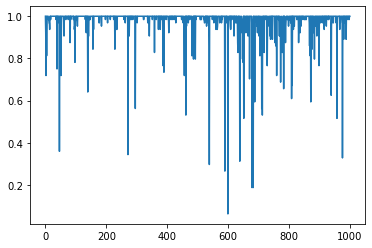

In [8]:
acc_fake_1.Value.plot()

In [1]:
import pandas as pd
import os
pok = pd.read_csv(os.path.join(os.environ['DATASETS'], 'pokemon_sprites_processed/pokemon.csv'))

In [3]:
pok.Type_1.unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [5]:
mapping = {'Grass': 'grass-bug', 
 'Fire': 'fire', 
 'Water': 'water-ice', 
 'Bug': 'grass-bug', 
 'Normal': 'normal-fighting', 
 'Poison': 'poison', 
 'Electric': 'electric',
 'Ground': 'ground-rock', 
 'Fairy': 'fairy', 
 'Fighting': 'normal-fighting', 
 'Psychic': 'psychic-ghost-dark', 
 'Rock': 'ground-rock', 
 'Ghost': 'psychic-ghost-dark', 
 'Ice': 'water-ice',
 'Dragon': 'dragon', 
 'Dark': 'psychic-ghost-dark', 
 'Steel': 'steel', 
 'Flying': 'flying'
}

In [26]:
pd.Series(mapping.values()).unique().shape

(12,)

In [16]:
mask = (pok.Type_1 == 'Normal') & (~pok.Type_2.isna())

In [18]:
pok['type_processed'] = pok.Type_1

In [20]:
pok.loc[mask, 'type_processed'] = pok.loc[mask, 'Type_2']

In [27]:
pok['type_12'] = pok.type_processed.replace(mapping)

In [28]:
pok.rename(columns={'type_processed': 'type_18'}, inplace=True)

In [29]:
pok.to_csv(os.path.join(os.environ['DATASETS'], 'pokemon_sprites_processed/pokemon.csv'), index=False)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils
import torch

In [6]:
from torchvision import datasets, transforms
from PIL import Image

In [64]:
ifolder = datasets.ImageFolder('/home/benoit/Pictures', transform=transforms.Compose([
    transforms.Resize([175, 175]),
    transforms.ToTensor()
]))

In [65]:
dl = torch.utils.data.DataLoader(ifolder, batch_size=len(ifolder), shuffle=True)

In [66]:
for batch, _ in dl:
    pass

In [67]:
grid = vutils.make_grid(
        batch,
        nrow=7,
        padding=1,
        scale_each=False,
        normalize=True).permute(1, 2, 0).squeeze()

In [76]:
plt.figure(figsize = (2^16+400, 2^16+400))
plt.imshow(grid)